Seleksi Fitur
1. Akurasi model dengan seleksi fitur = 76.69%
2. Akurasi model tanpa seleksi fitur = 79.14% ✅

Normalisasi
1. Akurasi model dengan normalisasi = 74.22999999999999%
2. Akurasi model tanpa normalisasi = 79.14% ✅

Hyperparameter Tuning
1. Akurasi model dengan hyperparameter tuning = 82.21000000000001% ✅
2. Akurasi model tanpa hyperparameter tuning = 79.14%

Kesimpulan =
Model mendapatkan akurasi tertinggi menggunakan hyperparameter tuning, tanpa seleksi fitur dan tanpa normalisasi.

---
#***Dataset***
---

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


---
#***Data Preprocessing***
---

Missing Value
---

In [ ]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),35,4.0,float64
Carbohydrates (Per 100 ml),1,0.0,float64
Sugars (Per 100 ml),8,1.0,float64
Fiber (Per 100 ml),301,37.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [ ]:
kolom_fitur = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)',
               'Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
               'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)',
               'Proteins (Per 100 ml)', 'Salt (Per 100 ml)']

for kolom in kolom_fitur:
  if df[kolom].isnull().any():
    median_val = df[kolom].median()
    df[kolom] = df[kolom].fillna(median_val)

In [ ]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


Label Encoding
---
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = df['Nutri_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


Splitting Data
---
---

In [ ]:
from sklearn.model_selection import train_test_split

X = df[kolom_fitur]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
print("X_train (data latih fitur):", X_train.shape)
print("X_test (data uji fitur):", X_test.shape)
print("y_train (data latih target):", y_train.shape)
print("y_test (data uji target):", y_test.shape)

X_train (data latih fitur): (648, 8)
X_test (data uji fitur): (163, 8)
y_train (data latih target): (648,)
y_test (data uji target): (163,)


Seleksi Fitur
---
---

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

use_feature_selection = False

X = df[kolom_fitur]

if use_feature_selection:
    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X, y)
    selected_mask = selector.get_support()
    features_used = [f for f, selected in zip(kolom_fitur, selected_mask) if selected]
    X = pd.DataFrame(X_selected, columns=features_used)
else:
    features_used = kolom_fitur

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df[kolom_fitur]
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

scores = selector.scores_

print("Skor semua fitur:")
for f, s in zip(kolom_fitur, scores):
    print(f"{f}: {s:.2f}")

if use_feature_selection:
    X_selected = selector.transform(X)
    selected_mask = selector.get_support()
    features_used = [f for f, selected in zip(kolom_fitur, selected_mask) if selected]
    X = pd.DataFrame(X_selected, columns=features_used)
    print("Fitur yang dipilih:", features_used)
else:
    features_used = kolom_fitur
    print("Feature selection was not used.")

Skor semua fitur:
Energy (Per 100 ml): 53.76
Fat (Per 100 ml): 30.11
Saturated fat (Per 100 ml): 36.86
Carbohydrates (Per 100 ml): 53.41
Sugars (Per 100 ml): 106.11
Fiber (Per 100 ml): 1.46
Proteins (Per 100 ml): 12.33
Salt (Per 100 ml): 5.95
Feature selection was not used.


Scalling Data
---
---

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=features_used)
X_test_df = pd.DataFrame(X_test, columns=features_used)

In [ ]:
print("X_train_df setelah StandardScaler:")
print(X_train_df.head())

print("\nX_test_df setelah StandardScaler:")
print(X_test_df.head())

X_train_df setelah StandardScaler:
   Energy (Per 100 ml)  Fat (Per 100 ml)  Saturated fat (Per 100 ml)  \
0            -0.786953         -0.388852                   -0.267113   
1             7.840430          5.774914                    3.390294   
2             0.074800         -0.388852                   -0.267113   
3             0.138816          0.094581                    0.123484   
4             0.094497         -0.388852                   -0.267113   

   Carbohydrates (Per 100 ml)  Sugars (Per 100 ml)  Fiber (Per 100 ml)  \
0                   -0.820505            -0.165156           -0.039314   
1                    3.837698             3.360021           -0.039314   
2                    0.606800             1.051656           -0.039314   
3                   -0.132803             0.031681           -0.039314   
4                    0.606800             1.051656           -0.039314   

   Proteins (Per 100 ml)  Salt (Per 100 ml)  
0              -0.524300          -0.0246

---
#***Training Model***
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=15)
dtc_model.fit(X_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(X_test)

# accuracy
dt_accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {dt_accuracy}%")

Akurasi Model: 79.14%


In [ ]:
# max depth optimal
for i in [7,9,11,13,15,17,19]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 7 = 0.6993865030674846
Akurasi max depth 9 = 0.754601226993865
Akurasi max depth 11 = 0.7791411042944786
Akurasi max depth 13 = 0.7484662576687117
Akurasi max depth 15 = 0.7914110429447853
Akurasi max depth 17 = 0.7730061349693251
Akurasi max depth 19 = 0.7607361963190185


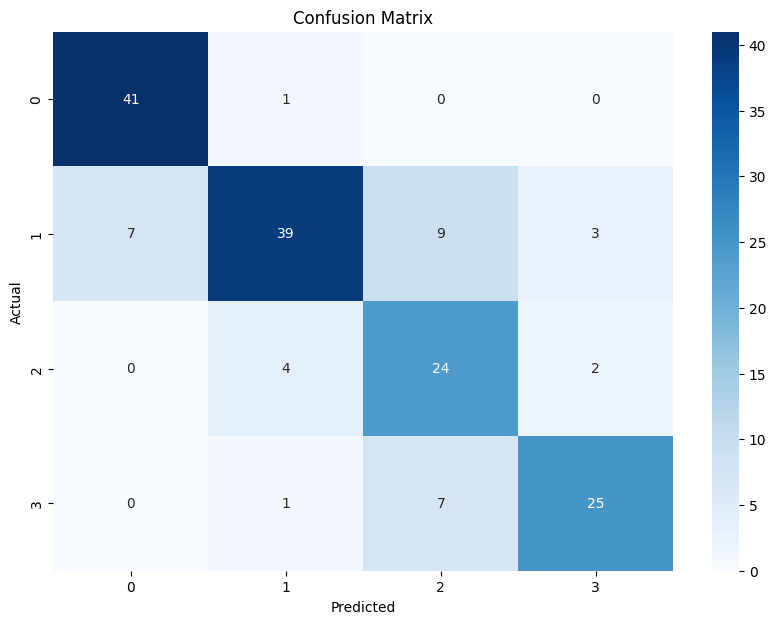

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7914110429447853
Precision: 0.7885416666666667
Recall: 0.8015450067174206
F1-Score: 0.7869


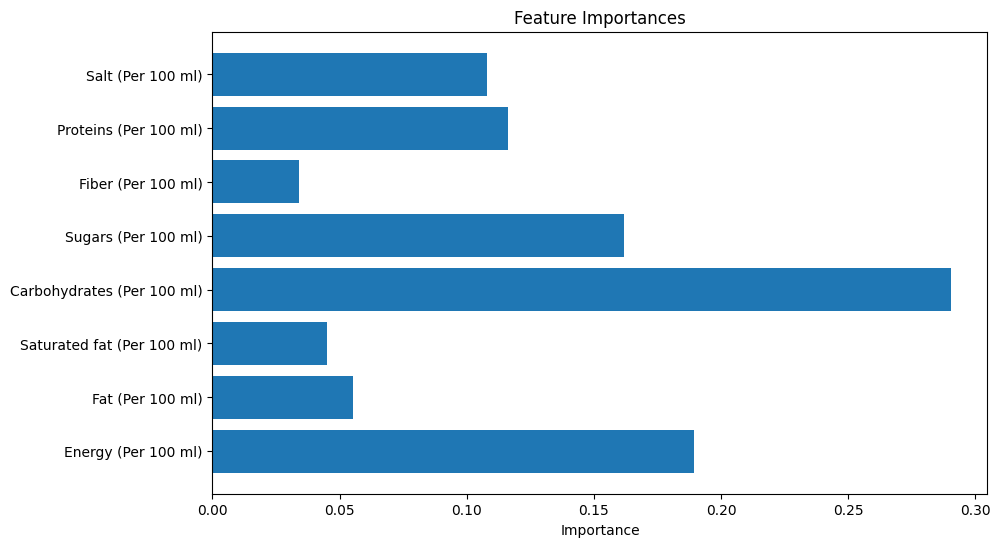

In [ ]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),
    'min_samples_split': [2, 5, 10]
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

dt_accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {dt_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Parameter Terbaik: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Akurasi Model Terbaik: 82.21000000000001%
Confusion Matrix:
 [[38  3  1  0]
 [ 7 43  3  5]
 [ 0  3 27  0]
 [ 0  6  1 26]]
Accuracy:  0.8220858895705522
Precision: 0.8208714145212266
Recall: 0.8220858895705522
F1 Score: 0.8206919039928361
